# Bisakah Regresi Linier Menangani Non-Linieritas?

Regresi linier akan memodelkan hubungan antara variabel prediktor dan target secara linier. Namun, pada kenyataannya, hubungan antara prediktor dan target sangat sulit diketahui. Maka dari itu, kita bisa juga meninjau kemungkinan lain dari hubungan yang terjadi antara prediktor dan target. Bisa jadi hubungan mereka adalah logaritmik, eksponensial, atau lainnya. Sebagai contoh, mari kita investigasi dataset "Pontius".

In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv("Data/Regression/Pontius/pontius.csv")
print(data.shape)
data.head()

(40, 2)


,Y,X
0,0.11019,150000
1,0.21956,300000
2,0.32949,450000
3,0.43899,600000
4,0.54803,750000


Ukuran dataset ini cukup kecil karena sumber dataset yang dicari spesifik yang memiliki hubungan non-linier, dalam kasus ini polinomial $Y = \beta_0 + \beta_1 x + \beta_1 x^2 + \epsilon  $.

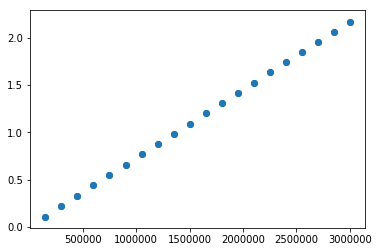

In [23]:
import matplotlib.pyplot as plt

plt.scatter(data['X'],data['Y'])
plt.show()

Walaupun tidak terlihat kuadratik, mari kita bandingkan MSE dari variabel prediktor derajat 1 saja dengan variabel prediktor dengan derajat hingga 2. Scikit learn sudah menyediakan pustaka untuk membantu menyiapkan variabel prediktor berderajat banyak, yakni PolynomialFeatures dari preprocessing. Kita akan mengujinya dengan model berderajat 1, 2, dan 3.

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)

x1 = data['X'].values.reshape(-1,1)
x2 = poly2.fit_transform(data['X'].values.reshape(-1,1))
x3 = poly3.fit_transform(data['X'].values.reshape(-1,1))

Mari kita lihat hasil dari transformasi masing-masing fitur polinomial terhadap X.

In [37]:
x2[:5,:]

array([[1.000e+00, 1.500e+05, 2.250e+10],
       [1.000e+00, 3.000e+05, 9.000e+10],
       [1.000e+00, 4.500e+05, 2.025e+11],
       [1.000e+00, 6.000e+05, 3.600e+11],
       [1.000e+00, 7.500e+05, 5.625e+11]])

In [38]:
x3[:5,:]

array([[1.00000e+00, 1.50000e+05, 2.25000e+10, 3.37500e+15],
       [1.00000e+00, 3.00000e+05, 9.00000e+10, 2.70000e+16],
       [1.00000e+00, 4.50000e+05, 2.02500e+11, 9.11250e+16],
       [1.00000e+00, 6.00000e+05, 3.60000e+11, 2.16000e+17],
       [1.00000e+00, 7.50000e+05, 5.62500e+11, 4.21875e+17]])

Kita bisa lihat di kolom pertama adalah nilai ketika derajat 0 yang menghasilkan 1. Nilai ini bisa kita hapus dan kita ambil kolom kedua dan seterusnya yang menunjukkan derajat kesatu hingga seterusnya.

In [39]:
x2 = x2[:,1:]
x3 = x3[:,1:]

Lalu, kita coba latih ketiga model ini dengan regresi linier dan membandingkan hasilnya dari masing-masing RSS latih (karena datanya cukup sedikit).

In [48]:
linreg1 = linear_model.LinearRegression()
linreg1.fit(x1,data['Y'])
Y_pred = linreg1.predict(x1)
RSS = np.sum((Y_pred - data['Y'])**2)
print("RSS untuk derajat 1: %.10lf" % RSS)

linreg2 = linear_model.LinearRegression()
linreg2.fit(x2,data['Y'])
Y_pred = linreg2.predict(x2)
RSS = np.sum((Y_pred - data['Y'])**2)
print("RSS untuk derajat 2: %.10lf" % RSS)

linreg3 = linear_model.LinearRegression()
linreg3.fit(x3,data['Y'])
Y_pred = linreg3.predict(x3)
RSS = np.sum((Y_pred - data['Y'])**2)
print("RSS untuk derajat 3: %.10lf" % RSS)

RSS untuk derajat 1: 0.0001791481
RSS untuk derajat 2: 0.0000015576
RSS untuk derajat 3: 0.0000015077


## Latihan: Investigasi Regresi Linier terhadap Data Non-linier
Diketahui suatu dataset "Filip" yang berjumlah 82 data dengan 1 variabel target dan 1 variabel prediktor. Bagilah data "Filip" tersebut menjadi data latih dan data uji dengan rasio 85:15 dan random seed 0. Lalu, lakukan observasi terhadap MSE uji dari model regresi linier dengan fitur polinomial dengan derajat 2,4,6,8,10,12,14,16,18,20 (Petunjuk: gunakanlah perulangan). Cetak MSE uji tiap model dari fitur polinomial yang dibentuk.

Tips: jangan lupa untuk menghapus kolom pertama yang dibuat oleh polynomial features.

In [49]:
data = pd.read_csv("Data/Regression/Filip/filip.csv")
print(data.shape)
data.head()

(82, 2)


,y,x
0,0.8116,-6.860121
1,0.9072,-4.324130
2,0.9052,-4.358625
3,0.9039,-4.358427
4,0.8053,-6.955852


In [ ]:
np.random.seed(0)
random_value = np.random.randn(data.shape[0])

#kita akan menggunakan cara slice yang berbeda
#untuk data latih dan uji saat ini
train = data[random_value<=None]
test = data[random_value>None]

Y_train = train['y']
Y_test = test['y']

for i in range(None,None,None):
#atau bentuk perulangan lain jika memiliki ide lain untuk perulangan
    
    x_train = train['x']
    x_test = test['x']
    
    #penentuan transformasi polinomial derajat ke-?
    poly = PolynomialFeatures(None)
    
    x_train = poly.fit_transform(x_train.values.reshape(-1,1))
    x_test = poly.fit_transform(x_test.values.reshape(-1,1))
    
    #menghapus polinomial dengan derajat 0
    x_train = x_train[None]
    x_test = x_test[None]
    
    #pembangunan model dengan data latih
    linreg = linear_model.LinearRegression()
    linreg.fit(x_train,Y_train)
    Y_pred = linreg.predict(x_test)
    mse = mean_squared_error(Y_pred,Y_test)
    print("Polynomial features degree %d, MSE: %.10lf" % (None,mse))
    

Pertanyaan: manakah model yang memiliki performa paling baik?